In [3]:
import plotly.io as pio
import os
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import correlate, find_peaks
from scipy.fft import fft, fftfreq
import pandas as pd


In [4]:
plt.style.use('classic')

In [5]:
base_path = "./ECG/"

audio_files_path = list(
    filter(
        lambda x : x.endswith(".wav"),
        os.listdir(base_path)
    )
)

print(f"Count of audio files: {len(audio_files_path)}")

Count of audio files: 563


In [6]:
lista_valores_paciente_prof = """
70126
69709
69278
69152
69140
69085
68856
68772
68437
68343
68270
68150
68024
67817
67622
67621
67585
67348
67006
66852
66665
66319
65809
65534
65171
64927
64889
64458
64320
63815
"""

lista_valores_paciente_prof = list(
    map(
        lambda x : x.strip(),
        lista_valores_paciente_prof.split("\n")
    )
)[1:-1]

lista_valores_paciente_prof

['70126',
 '69709',
 '69278',
 '69152',
 '69140',
 '69085',
 '68856',
 '68772',
 '68437',
 '68343',
 '68270',
 '68150',
 '68024',
 '67817',
 '67622',
 '67621',
 '67585',
 '67348',
 '67006',
 '66852',
 '66665',
 '66319',
 '65809',
 '65534',
 '65171',
 '64927',
 '64889',
 '64458',
 '64320',
 '63815']

In [7]:
#take the lista_valores_paciente_prof including the audio files

def filter_function(x):
    '''
    '''
    return x in lista_valores_paciente_prof




audio_files_path_paciente_prof = list(
    filter(
        lambda x : filter_function(x.split("-")[0]),
        audio_files_path
    )
)
audio_files_path_paciente_prof

['67585-1K-raw.wav',
 '67348-1K-raw.wav',
 '68437-1K-raw.wav',
 '67817-1K-raw.wav',
 '69278-1K-raw.wav',
 '67621-1K-raw.wav',
 '70126-1K-raw.wav',
 '68343-1K-raw.wav',
 '64927-1K-raw.wav',
 '64320-1K-raw.wav',
 '69152-1K-raw.wav',
 '68772-1K-raw.wav',
 '66319-1K-raw.wav',
 '63815-1K-raw.wav',
 '66852-1K-raw.wav',
 '69709-1K-raw.wav',
 '68856-1K-raw.wav',
 '69085-1K-raw.wav',
 '64458-1K-raw.wav',
 '69140-1K-raw.wav',
 '65534-1K-raw.wav',
 '67006-1K-raw.wav',
 '65809-1K-raw.wav',
 '68024-1K-raw.wav',
 '66665-1K-raw.wav',
 '67622-1K-raw.wav',
 '65171-1K-raw.wav',
 '68150-1K-raw.wav',
 '64889-1K-raw.wav',
 '68270-1K-raw.wav']

In [8]:
print(f"Count of audio files: {len(audio_files_path_paciente_prof)}")
audios                  = []
audios_frequencies      = []
audios_coefficients     = []
all_coefficients = [] # Initialize here

# Parámetros de la CWT
wavelet = 'cgau1'  # Se puede cambiar por otra wavelet
scales = np.arange(1, 60)  # Rango de escalas para la CWT
max_length = 0  # Variable to store the maximum length


Count of audio files: 30


In [ ]:

for idx, audio_file_path in enumerate(audio_files_path_paciente_prof):

    audio_file_example = base_path + audio_file_path
    print(f"Audio file analyzed: {audio_file_example}")

    sample_rate, audio_data = wav.read(audio_file_example)
    audio_data = audio_data / np.max(np.abs(audio_data))

    print(f"Sample rate: {sample_rate}")
    audios.append(audio_data)

    max_length = max(max_length, len(audio_data)) # Find the maximum length

for idx, audio_file_path in enumerate(audio_files_path_paciente_prof): # Second loop to process and pad

    audio_file_example = base_path + audio_file_path
    sample_rate, audio_data = wav.read(audio_file_example)
    audio_data = audio_data / np.max(np.abs(audio_data))

    # **Ensure Consistent Length - Padding** corregir
    current_length = len(audio_data)
    if current_length < max_length:
        padding_length = max_length - current_length
        audio_data = np.pad(audio_data, (0, padding_length), 'constant') # Pad with zeros at the end

    # Aplicar CWT a la señal de ECG
    coefficients, frequencies = pywt.cwt(
        audio_data,
        scales,
        wavelet,
        1 / sample_rate
    )

    print(f"Shape of coefficients for {audio_file_path}: {coefficients.shape}") # Debugging: Print shape
    audios_frequencies.append(frequencies)
    audios_coefficients.append(coefficients)
    all_coefficients.append(coefficients) # Append coefficients

# Calculate the average of the wavelet transform coefficients
average_coefficients = np.mean(np.array(all_coefficients), axis=0)

# ... (rest of the plotting code - unchanged) ...

Audio file analyzed: ./ECG/67585-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/67348-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/68437-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/67817-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/69278-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/67621-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/70126-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/68343-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/64927-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/64320-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/69152-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/68772-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/66319-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/63815-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/66852-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/69709-1K-raw.wav
Sample rate: 1000
Audio fi

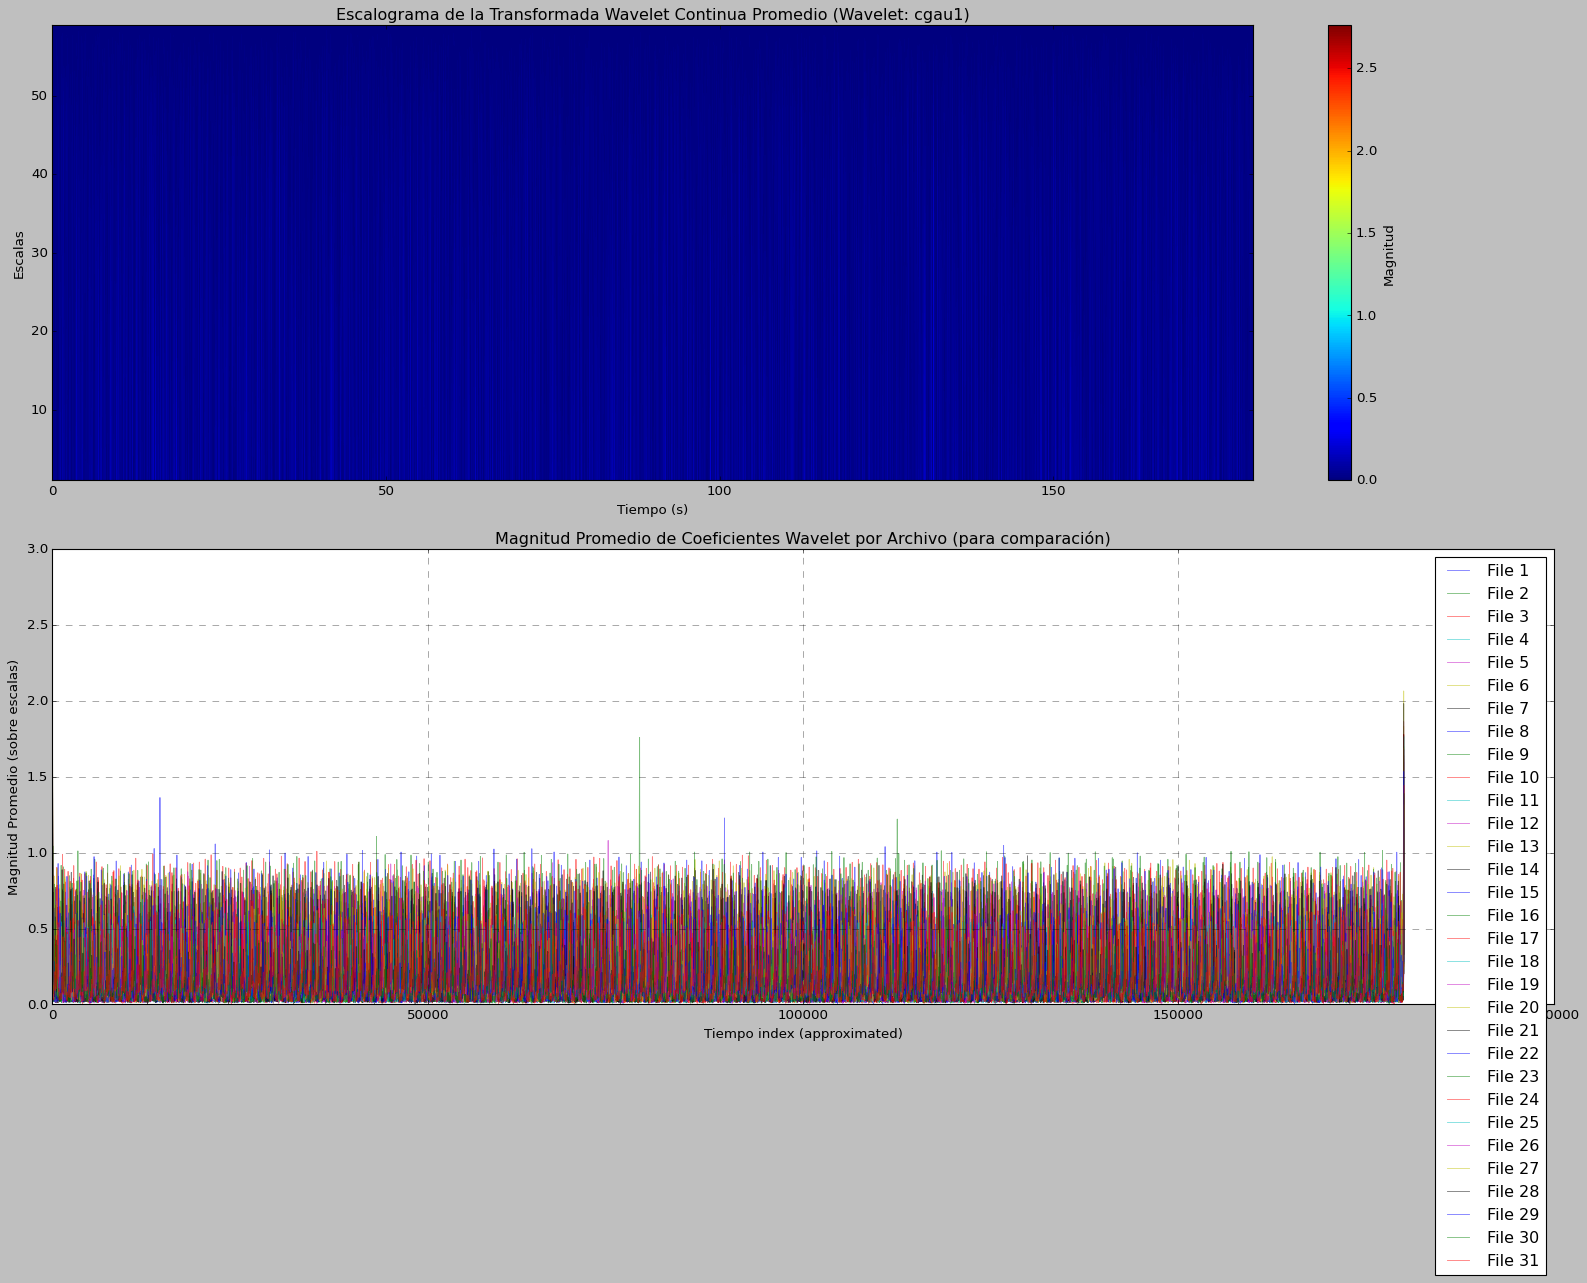

In [ ]:

# Plotting the average wavelet transform and individual transforms

figure = plt.figure(figsize=(20, 15)) # Adjust figure size for better layout

# Plotting the average wavelet transform
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
plt.imshow(
    np.abs(average_coefficients),
    extent=[
        0,
        len(audios[0]) / sample_rate if audios else 0, # Using length of the first audio if available, else 0
        1,
        max(scales)
    ],
    cmap='jet',
    aspect='auto',
    vmax=np.max(np.abs(average_coefficients)),
    vmin=0
)

plt.colorbar(label='Magnitud')
plt.xlabel('Tiempo (s)')
plt.ylabel('Escalas')
plt.title(f'Escalograma de la Transformada Wavelet Continua Promedio (Wavelet: {wavelet})')
plt.tight_layout()


plt.subplot(2, 1, 2)
for idx, audio_file_path in enumerate(audio_files_path_paciente_prof):
    plt.plot(np.mean(np.abs(audios_coefficients[idx]), axis=0), label=f'File {idx+1}', alpha=0.5, linewidth=0.8)

plt.xlabel('Tiempo index (approximated)')
plt.ylabel('Magnitud Promedio (sobre escalas)')
plt.title('Magnitud Promedio de Coeficientes Wavelet por Archivo (para comparación)')
plt.legend(title="Archivos de Audio", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# # Plotting individual wavelet transforms (optional, for comparison)
# plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
# for idx, audio_file_path in enumerate(audio_files_path_paciente_prof):
#     plt.plot(np.mean(np.abs(audios_coefficients[idx]), axis=0), label=f'File {idx+1}') # Average magnitude across scales for each file

    
# plt.xlabel('Tiempo index (approximated)') # Time axis is approximate index here after averaging over scales
# plt.ylabel('Magnitud Promedio (sobre escalas)')
# plt.title('Magnitud Promedio de Coeficientes Wavelet por Archivo (para comparación)')
plt.legend()
plt.tight_layout()


plt.show()